# Importing Libraries

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import autokeras as ak
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset and removing the non-essential features.
Then exporting it to cleandata.csv

CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [2]:
# loading dataset
df = pd.read_csv('boston.csv')
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [3]:
print(df.columns)

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')


In [4]:

# Drop the unnecessary column
df = df.drop("Unnamed: 0", axis=1)

# Remove any duplicated rows
df = df.drop_duplicates()

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
# Remove any outliers using the interquartile range method
Q1 = df.quantile(0.25) # First quartile
Q3 = df.quantile(0.75) # Third quartile
IQR = Q3 - Q1 # Interquartile range
lower_bound = Q1 - 1.5 * IQR # Lower bound
upper_bound = Q3 + 1.5 * IQR # Upper bound
df = df[(df >= lower_bound) & (df <= upper_bound)] # Filter out outliers

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
# Fill any missing values with the mean of the column
df = df.fillna(df.mean())
# Randomize the order of rows
df = df.sample(frac=1).reset_index(drop=True)

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.021770,3.192922,2.03,0.0,0.415,7.610000,15.7,6.2700,2.0,348.0,14.7,395.380000,3.11,20.719099
1,0.027290,0.000000,7.07,0.0,0.469,7.185000,61.1,4.9671,2.0,242.0,17.8,392.830000,4.03,34.700000
2,0.056440,3.192922,6.41,0.0,0.447,6.758000,32.9,4.0776,4.0,254.0,17.6,396.900000,3.53,32.400000
3,0.259150,0.000000,21.89,0.0,0.624,5.693000,96.0,1.7883,4.0,437.0,21.2,392.110000,17.19,16.200000
4,1.463360,0.000000,19.58,0.0,0.605,7.489000,90.8,1.9709,5.0,403.0,14.7,374.430000,1.73,20.719099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.198341,0.000000,18.10,0.0,0.693,5.987000,100.0,1.5888,24.0,666.0,20.2,396.900000,26.77,5.600000
502,0.144550,12.500000,7.87,0.0,0.524,6.172000,96.1,5.9505,5.0,311.0,15.2,396.900000,19.15,27.100000
503,3.774980,0.000000,18.10,0.0,0.655,5.952000,84.7,2.8715,24.0,666.0,20.2,388.705711,17.15,19.000000
504,0.575290,0.000000,6.20,0.0,0.507,6.233212,73.3,3.8384,8.0,307.0,17.4,385.910000,2.47,20.719099


In [7]:
# Save the cleaned data to a new file
df.to_csv("cleandata.csv", index=False)
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')


# Explore the data and perform some descriptive statistics. (Visualizing the Data)
Then splitting it to Train and test

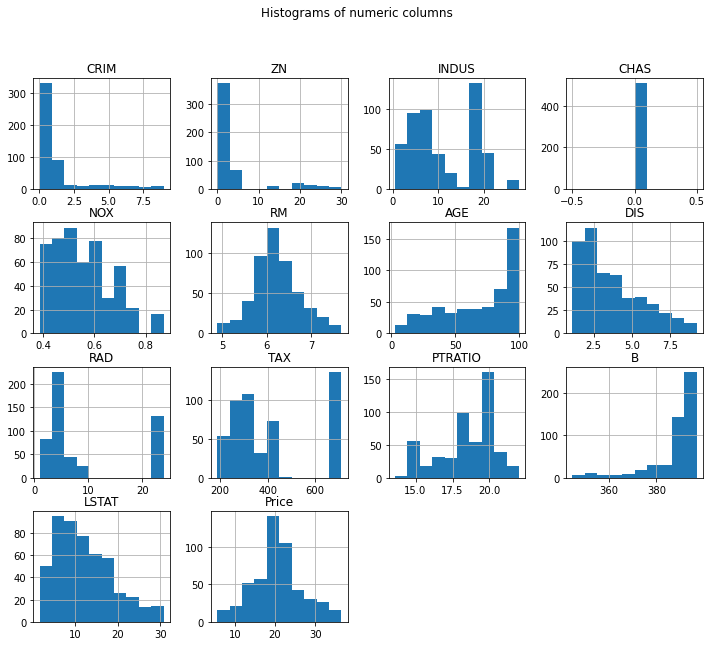

In [8]:

# Load the cleaned data into a dataframe
df = pd.read_csv("cleandata.csv")

# Create a histogram for each numeric column to show the distribution of values
df.hist(figsize=(12,10))
plt.suptitle("Histograms of numeric columns")
plt.show()

C:\Users\ahmed\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\ahmed\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\ahmed\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


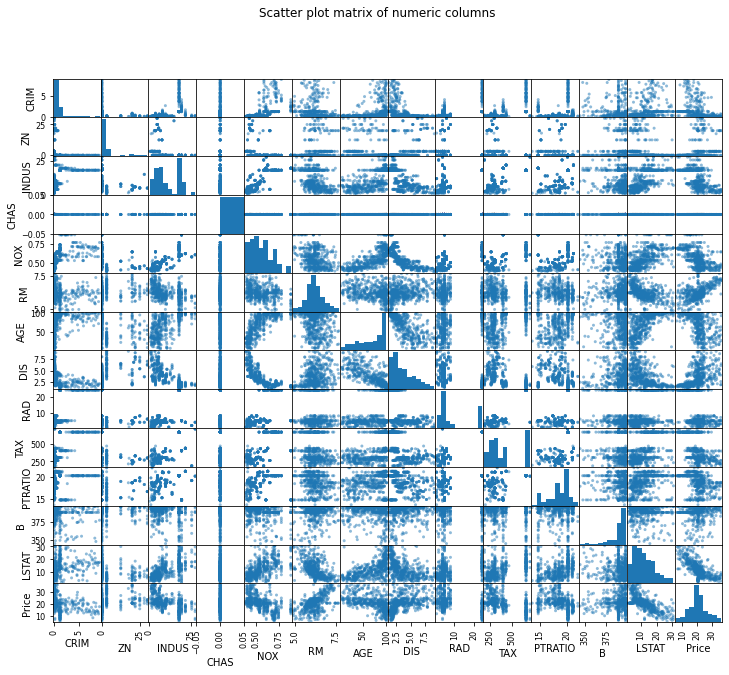

In [9]:

# Create a scatter plot matrix to show the pairwise relationships between numeric columns
pd.plotting.scatter_matrix(df, figsize=(12,10))
plt.suptitle("Scatter plot matrix of numeric columns")
plt.show()

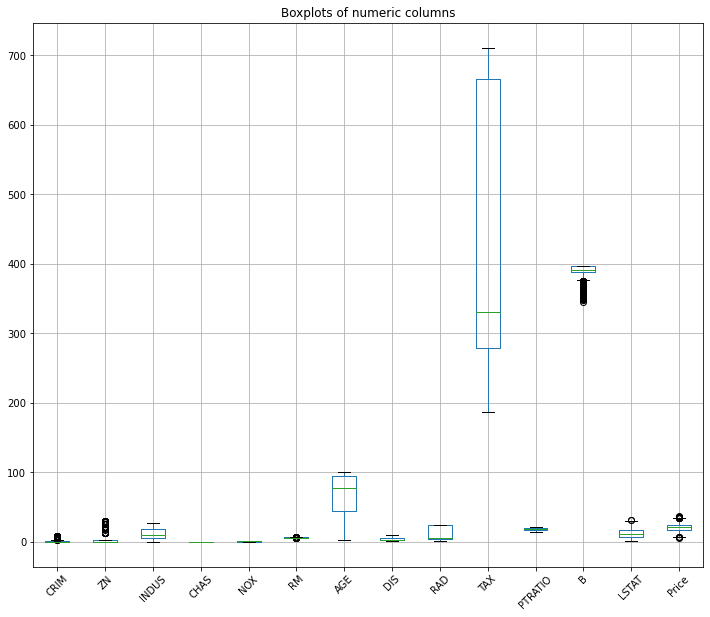

In [10]:

# Create a boxplot for each numeric column to show the summary statistics and outliers
df.boxplot(figsize=(12,10), rot=45)
plt.title("Boxplots of numeric columns")
plt.show()

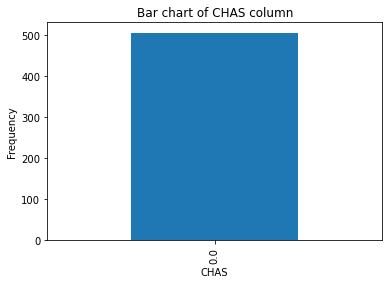

In [11]:

# Create a bar chart for the CHAS column to show the frequency of each category
df["CHAS"].value_counts().plot(kind="bar")
plt.title("Bar chart of CHAS column")
plt.xlabel("CHAS")
plt.ylabel("Frequency")
plt.show()

# Conclusion
 The data is clean and ready for training.

# Train the Multivariable Regression model on the train dataset

In [12]:

# Define the features and the target variable
X = df.drop("Price", axis=1) # Features
y = df["Price"] # Target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Create and fit an autokeras regressor
reg = ak.StructuredDataRegressor(max_trials=3)
reg.fit(X_train, y_train , epochs=1000)

INFO:tensorflow:Reloading Tuner from .\structured_data_regressor\tuner0.json
INFO:tensorflow:Oracle triggered exit
Epoch 1/1000
13/13 [==============================] - 1s 4ms/step - loss: 442.3381 - mean_squared_error: 442.3381
Epoch 2/1000
13/13 [==============================] - 0s 4ms/step - loss: 417.2347 - mean_squared_error: 417.2347
Epoch 3/1000
13/13 [==============================] - 0s 4ms/step - loss: 387.0682 - mean_squared_error: 387.0682
Epoch 4/1000
13/13 [==============================] - 0s 4ms/step - loss: 349.2557 - mean_squared_error: 349.2557
Epoch 5/1000
13/13 [==============================] - 0s 4ms/step - loss: 302.4698 - mean_squared_error: 302.4698
Epoch 6/1000
13/13 [==============================] - 0s 4ms/step - loss: 247.6201 - mean_squared_error: 247.6201
Epoch 7/1000
13/13 [==============================] - 0s 4ms/step - loss: 189.3868 - mean_squared_error: 189.3868
Epoch 8/1000
13/13 [==============================] - 0s 4ms/step - loss: 136.0077 - me

In [26]:

# Evaluate the model on the test set
mse, r2 = reg.evaluate(X_test, y_test)
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

4/4 [==============================] - 0s 4ms/step - loss: 27.9891 - mean_squared_error: 27.9891
Mean squared error: 27.99
R-squared: 27.99


In [19]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

4/4 [==============================] - 0s 4ms/step
Mean squared error: 27.99
R-squared: 0.37


In [15]:

# Export the best model
model = reg.export_model()
model.save("best_model", save_format="tf")

INFO:tensorflow:Assets written to: best_model\assets
